<a href="https://colab.research.google.com/github/ConstDobrovol/FU_CV/blob/master/%D0%9C%D0%97_%D0%94%D0%BE%D0%B1%D1%80%D0%BE%D0%B2%D0%BE%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%9B%D0%B0%D0%B12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторная работа №2: Классические методы машинного зрения**

# Импорт необходимых библиотек

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Загрузите изображение и преобразуйте его в градации серого.

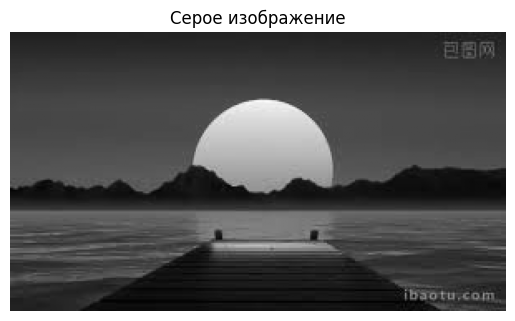

In [18]:
image = cv2.imread('images.jpeg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.title('Серое изображение')
plt.axis('off')
plt.show()

# 2. Построение гистограммы изображения


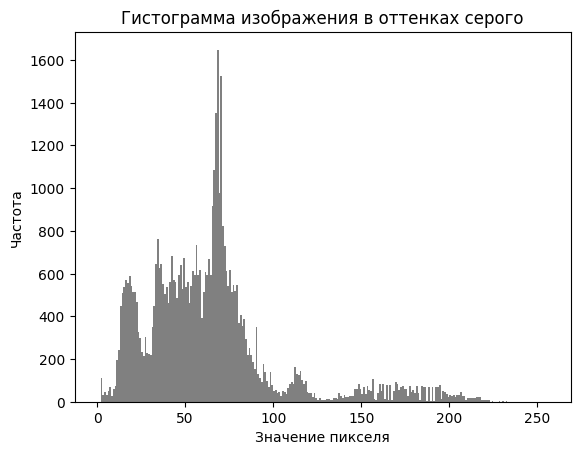

In [19]:
plt.hist(gray_image.ravel(), bins=256, range=[0, 256], color='gray')
plt.title('Гистограмма изображения в оттенках серого')
plt.xlabel('Значение пикселя')
plt.ylabel('Частота')
plt.show()

# 3. Выравнивание гистограммы

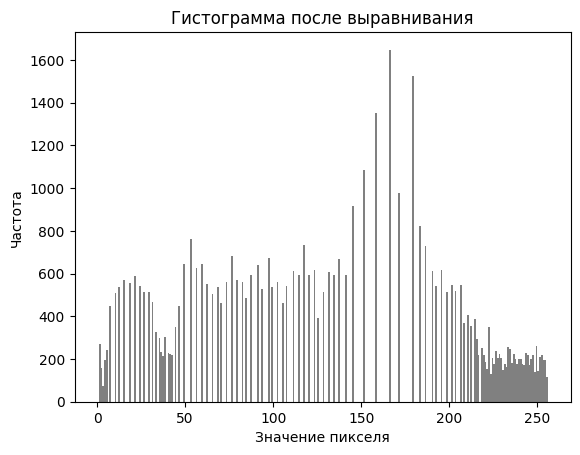

In [20]:
image_hist_eq = cv2.equalizeHist(gray_image)
plt.hist(image_hist_eq.ravel(), bins=256, range=[0, 256], color='gray')
plt.title('Гистограмма после выравнивания')
plt.xlabel('Значение пикселя')
plt.ylabel('Частота')
plt.show()

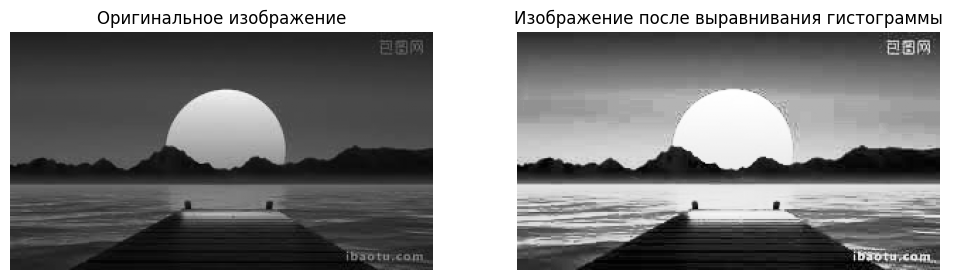

In [21]:
# Отображение оригинального и выравненного изображений
plt.figure(figsize=(12, 6))

# Оригинальное изображение
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Оригинальное изображение')
plt.axis('off')

# Выравненное изображение
plt.subplot(1, 2, 2)
plt.imshow(image_hist_eq, cmap='gray')
plt.title('Изображение после выравнивания гистограммы')
plt.axis('off')

plt.show()

# 4. Создание масок для размытия и повышения резкости


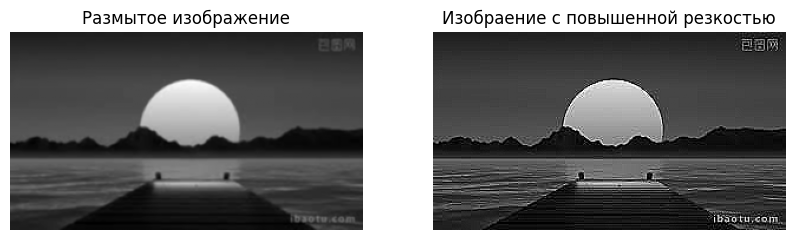

In [22]:
blur_mask = np.array([[1/16, 1/8, 1/16],
                      [1/8, 1/4, 1/8],
                      [1/16, 1/8, 1/16]])

sharpen_mask = np.array([[0, -1, 0],
                         [-1, 5, -1],
                         [0, -1, 0]])

# Применение свертки
blurred_image = cv2.filter2D(gray_image, -1, blur_mask)
sharpened_image = cv2.filter2D(gray_image, -1, sharpen_mask)

# Отображение результатов размытия и повышения резкости
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(blurred_image, cmap='gray')
plt.title('Размытое изображение')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Изобраение с повышенной резкостью')
plt.axis('off')
plt.show()

# 5. Применение оператора Собеля для обнаружения границ


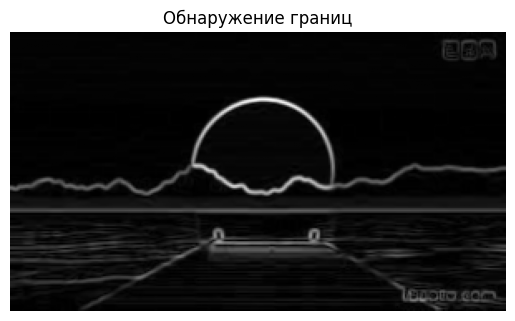

In [23]:
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

# Отображение результата
plt.imshow(sobel_edges, cmap='gray')
plt.title('Обнаружение границ')
plt.axis('off')
plt.show()


# 6. Создание бинарного изображения с использованием пороговой обработки

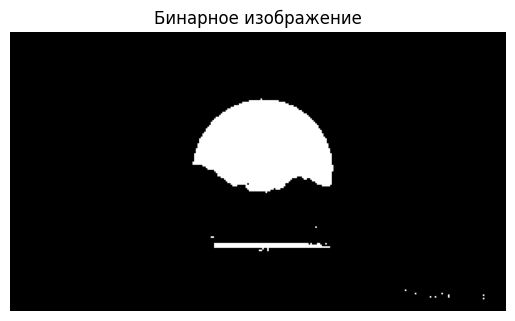

In [24]:
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Отображение бинарного изображения
plt.imshow(binary_image, cmap='gray')
plt.title('Бинарное изображение')
plt.axis('off')
plt.show()

# 7. Применение морфологических операций (обработка бинарных изображений на основе форм для улучшения сегментации)


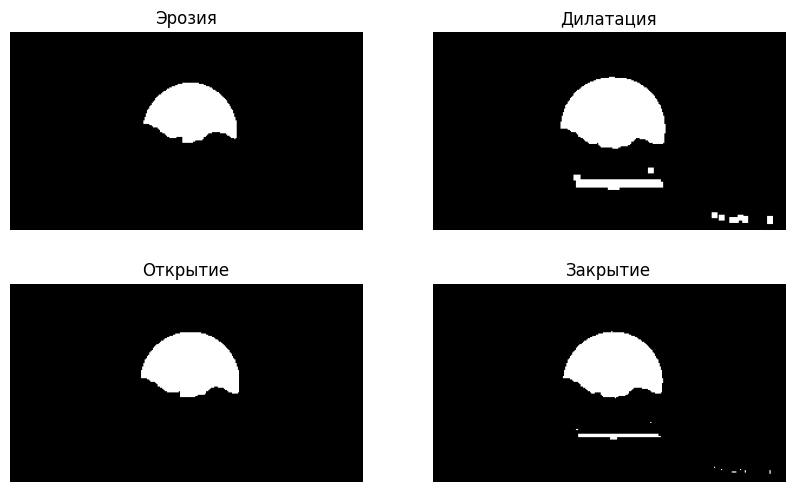

In [25]:
kernel = np.ones((5, 5), np.uint8) # Размер ядра влияет на степень воздействия операции на изображение.

erosion = cv2.erode(binary_image, kernel)
# Эрозия "сжимает" белые области (пиксели со значением 255), удаляя пиксели по краям объектов.
# Если хотя бы один пиксель в области, охватываемой ядром, равен 0 (черный), центральный пиксель также становится 0. Это помогает удалять мелкие шумы и детали.
dilation = cv2.dilate(binary_image, kernel)
# Дилатация наоборот. Если хотя бы один пиксель в области белый, центральный пиксель становится 255. Это помогает заполнять небольшие пробелы и соединять разорванные части объектов.
opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
# Открытие — это комбинация эрозии, за которой следует дилатация, что позволяет сохранить форму крупных объектов.
closing = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
# Закрытие — это комбинация дилатации, за которой следует эрозия, позволяет сохранить форму крупных объектов и удалить мелкие пробелы.

# Отображение результатов морфологических операций
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.imshow(erosion, cmap='gray')
plt.title('Эрозия')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(dilation, cmap='gray')
plt.title('Дилатация')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(opening, cmap='gray')
plt.title('Oткрытие')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(closing, cmap='gray')
plt.title('Закрытие')
plt.axis('off')

plt.show()

# 8. Аффинные преобразования: поворот, масштабирование и сдвиг

## Поворот

In [26]:
rows, cols = image.shape[:2]
M_rotate = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1) # Поворот на 45 градусов
rotated_image = cv2.warpAffine(image, M_rotate, (cols, rows)) # Поворот изображения

## Масштабирование

In [27]:
M_scale = cv2.getRotationMatrix2D((0,0), 0, 0.5)
scaled_image = cv2.warpAffine(image, M_scale, (cols//2, rows//2))

## Сдвиг

In [28]:
M_shift = np.float32([[1, 0, 50], [0, 1, 50]]) # Сдвиг на (50,50)
shifted_image = cv2.warpAffine(image, M_shift, (cols + 50, rows + 50))

### Отображение результатов аффинных преобразований

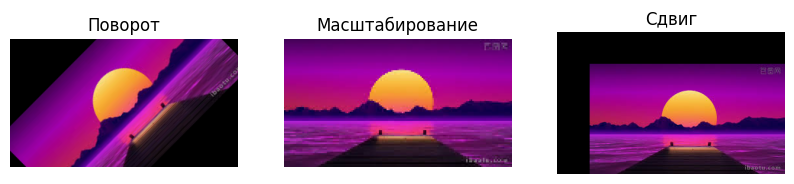

In [30]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title('Поворот')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
plt.title('Масштабирование')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(shifted_image, cv2.COLOR_BGR2RGB))
plt.title('Сдвиг')
plt.axis('off')

plt.show()

### **Контрольные вопросы:**

1. Как выравнивание гистограммы влияет на контраст изображения?

2. В чем разница между сверткой с маской размытия и маской повышения резкости?

3. Как оператор Собеля помогает обнаруживать границы?

4. Какие морфологические операции используются для обработки бинарных изображений?

5. Какие аффинные преобразования можно применить к изображению?

1. Как выравнивание гистограммы влияет на контраст изображения?

Выравнивание гистограммы — это метод улучшения контраста изображения путем перераспределения интенсивности пикселей. Основная идея заключается в том, чтобы растянуть диапазон яркости пикселей, что позволяет более равномерно распределить их по всему диапазону значений.

• Увеличение контраста: Выравнивание гистограммы помогает выделить детали в изображении, которые могут быть потеряны из-за недостаточного контраста. Например, в изображениях с низким контрастом (где большинство пикселей имеют близкие значения) выравнивание может сделать темные области темнее, а светлые — светлее.

• Распределение яркости: После выравнивания гистограмма становится более равномерной, что приводит к лучшему восприятию деталей и текстур.

2. В чем разница между сверткой с маской размытия и маской повышения резкости?

• Свертка с маской размытия используется для уменьшения шума и сглаживания изображения. Результат — более мягкое изображение с потерей мелких деталей.

• Свертка с маской повышения резкости: используется для увеличения четкости и выделения деталей в изображении. Результат — изображение с более четкими границами и деталями.

3. Как оператор Собеля помогает обнаруживать границы?

Оператор Собеля — это метод детекции границ, который использует свертку с двумя масками (фильтрами) для выделения горизонтальных и вертикальных границ в изображении:

• Горизонтальные и вертикальные границы: Оператор использует две маски: одна для обнаружения вертикальных границ (изменения по оси x), а другая для горизонтальных границ (изменения по оси y).

• Градиенты: С помощью этих масок вычисляются градиенты яркости. Высокие значения градиента указывают на наличие резкого изменения яркости, что обычно соответствует границе объекта.

• Комбинирование: Результаты обоих фильтров могут быть объединены для получения полной карты границ.

4. Какие морфологические операции используются для обработки бинарных изображений?

Морфологические операции применяются к бинарным изображениям и включают:

• Эрозия: Уменьшает размеры объектов в бинарном изображении, удаляя пиксели на границе. Это полезно для удаления мелких шумов.

• Дилатация: Увеличивает размеры объектов, добавляя пиксели к границам. Используется для заполнения пробелов и соединения близко расположенных объектов.

• Открытие: Сначала применяется эрозия, затем дилатация. Это помогает удалить мелкие объекты и сохранить большие.

• Закрытие: Сначала применяется дилатация, затем эрозия. Это позволяет заполнять небольшие дыры внутри объектов.

• Границы: Вычисляются как разность между оригинальным изображением и его эрозией, что позволяет выделить края объектов.

5. Какие аффинные преобразования можно применить к изображению?

Аффинные преобразования сохраняют параллельность линий и соотношение расстояний между точками. К ним относятся:

• Трансляция: Сдвиг изображения на заданное расстояние по горизонтали и/или вертикали.

• Масштабирование: Изменение размера изображения в зависимости от заданного коэффициента масштабирования (уменьшение или увеличение).

• Поворот: Поворот изображения вокруг заданной точки на определенный угол.

• Можно комбинировать несколько аффинных преобразований.